<a href="https://colab.research.google.com/github/Ciambelle-Ciociare/ADM_homework4/blob/main/DMT2023_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DMT 2023 - Homework 4

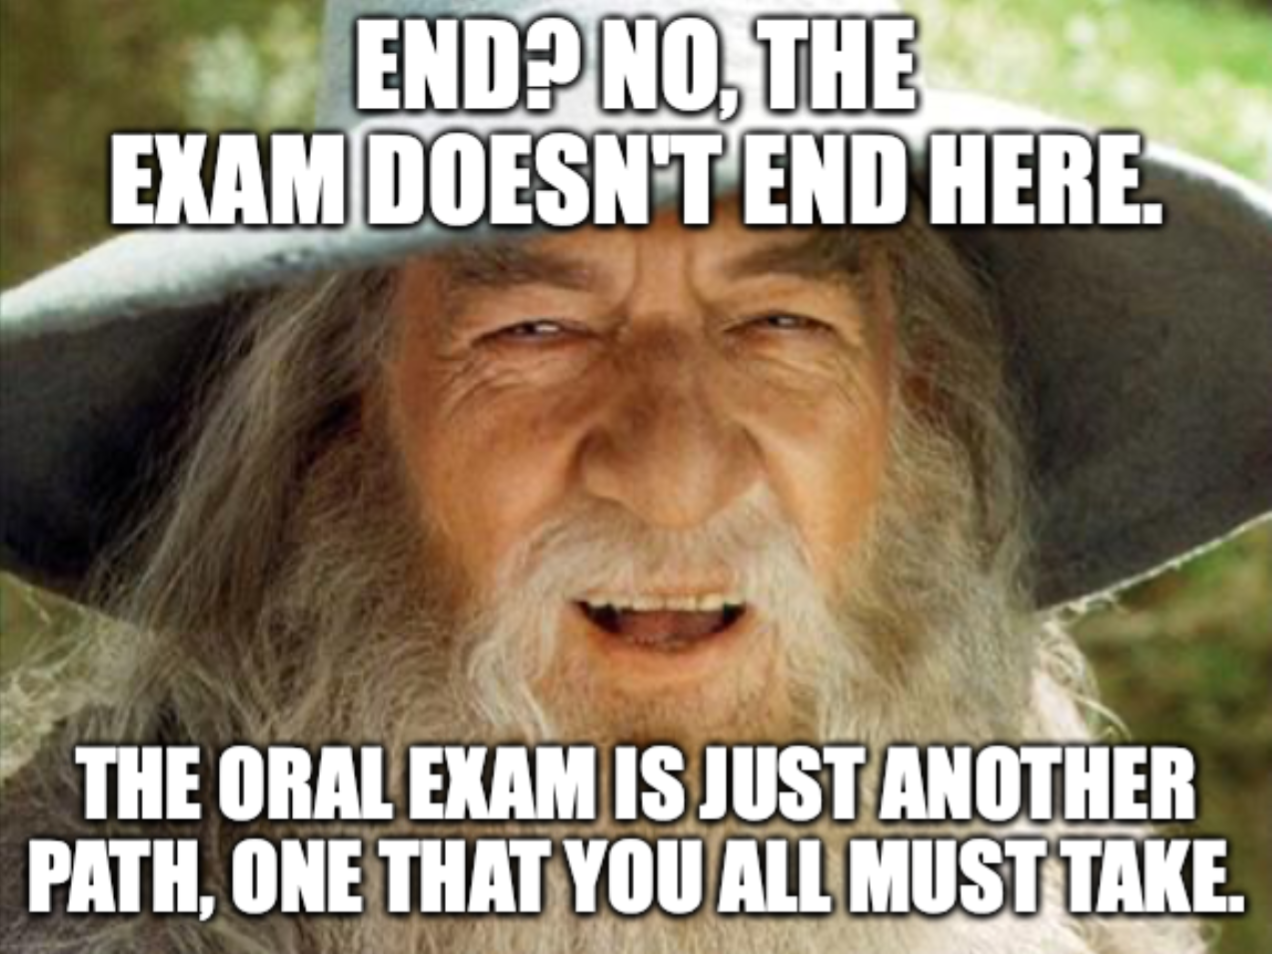


# Instructions for the homework
  > Follow the instructions in the notebook carefully
  


## General instructions
  * Do NOT remove ANYTHING that is already in the notebook.
  * Before you start, show the line number for the code cells:
    * Go to Tools -> Settings -> Editor -> show line numbers
  * Having **EXACTLY TWO** students per group is **MANDATORY**
  * The software must be commented.
  * The notebook will be converted to a PDF, so you must use prints and plots that are displayed in the derived PDF.
  * About this notebook:
    * Create a personal copy to be able to modify it: File > Save a copy in Drive
    * Rename the copied notebook `DMT2023-HW4.ipynb`


## Instructions for **code**:
  * DO NOT add code cells
  * DO NOT remove any code cells
  * Only edit the code cells containing the comment `#YOUR CODE STARTS HERE#`. Within those cells:
    * DO NOT remove ANYTHING that we have written (otherwise specified). In particular, the line `#REMOVE_OUTPUT#` is used in some cells to remove the output of those cells when the notebook is converted to PDF.
    * Add your code between line `#YOUR CODE STARTS HERE#` and line `#YOUR CODE ENDS HERE#`; **DO NOT REMOVE THESE COMMENTS**
    * The last line in each code cell is #THIS IS LINE \<TOT>#, where \<TOT> is a line number. The notebook is constructed so that \<TOT> matches with the line number in which it is written, but it may of course move as you add your code. **Make sure that, when you deliver it, that comment returns to line \<TOT>.** DO NOT CHANGE THE \<TOT> VALUE. Of course, this means that you have a limited number of lines of code that you may NOT exceed under any circumstances. On the other hand, if your code is shorter than that, you have to reach that line number with empty lines.

[comment]: <> (#REMOVE_CELL#)


## Instructions for **text**:
* DO NOT add text cells
* DO NOT remove text cells
* DO NOT modify the text cells we have created.
* Only edit text cells starting with the comment ------------YOUR TEXT STARTS HERE------------. Within those cells:
  * Do NOT remove anything we have entered.
  * **Add your own text after the line ------------YOUR TEXT STARTS HERE------------; DO NOT REMOVE THIS TEXT**
  * For each cell, a specific delivery will be given. If you are given a maximum number of sentences to write, both the dot "." and the semicolon ";" will be considered sentence dividers.

[comment]: <> (#REMOVE_CELL#)

## Group composition:

Write down the list of group members. The format should be Last Name, First Name, Student ID. Group members should be sorted alphabetically by surname and placed on different lines.
Example:

Becchetti, Luca, 123456

Siciliano, Federico, 987654

------------YOUR TEXT STARTS HERE-----------
\\

Barba, Paolo 1885324 \\
Bassani, Aurora 1852791



<div style="page-break-after: always; visibility: hidden"> 
\pagebreak
</div>

## Homework 4
The homework consists of two parts:

  1. Text Representation

  and

  2. Deep Learning

> Ensure that the notebook can be faithfully reproduced by anyone (hint: pseudo random number generation).

> If you need to set a random seed, set it to `709`.

> If multiple code cells are provided for a single part, it is **NOT** mandatory to use them all.

# Part 1
In this part of the homework, you have to deal with Text Representation.

Import **ALL** the Python packages that you need for Part 1.

In [ ]:
!pip install jsonlines
!pip install langdetect
!pip install googletrans==3.1.0a0

In [3]:
#REMOVE_OUTPUT
#!pip install --upgrade --no-cache-dir gdown
#YOUR CODE STARTS HERE#
import pandas as pd
import numpy as np 
import time , string , jsonlines , nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from nltk.corpus import stopwords
from googletrans import Translator
from langdetect import detect
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline 
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Part 1.1
The company **F**antastic **S**olution sells products. Customers can leave product reviews on their platform. The company wants to classify the reviews into positive and negative.

Their requirements are unclear: they mention both accuracy and calculation time, but it is not known which is more important to them. :'(

They also forbid you to do a hyper-parameter optimisation.
(why? :O )

To help you (?), they have already pre-processed the data. They have translated each text into a random language.

The best thing to do is to provide them with a list of models that can best meet their (unclear) requirements.

### 1.1.1
Download the data from the Drive link (code already provided).

In [4]:
#REMOVE_OUTPUT#
!gdown 1X6QnCcOgnNEBQ1xnilmPWqDIs7bRrQof

Downloading...
From: https://drive.google.com/uc?id=1X6QnCcOgnNEBQ1xnilmPWqDIs7bRrQof
To: /content/FS_reviews.jsonl
100% 18.3M/18.3M [00:00<00:00, 158MB/s]


### 1.1.2
Understand (!) and pre-process *(general term!)* the data.
Divide the data according to your needs.

> No specific request


In [5]:
#YOUR CODE STARTS HERE#





translator = Translator() #  Set the translator
en_stop = set(stopwords.words('english')) # Set the english stopwords
stemmer = nltk.stem.PorterStemmer()       # Set the stemmer



# Function to translate text using Google Translate API
def translate_text(text):
  language = detect(text[:30]) # Detect weather the text is in english or not
  if language != 'en':
    translation = translator.translate(text, dest='en') # translate
    return translation.text
  return text




def preprocess_data(doc_text): # create English stop words list
    min_length = 2             # defining the minimum length of each word
    text_no_punctuation = doc_text.translate(str.maketrans('', '', string.punctuation)) # Remove the puntaction
    tokenized_text = text_no_punctuation.split(" ") 
    stopped_tokens = [token.lower() for token in tokenized_text if not token in en_stop]   # Convert  in lower case and remove stopwords    
    meaningful_tokens = [stemmer.stem(token) for token in stopped_tokens if len(token) > min_length]  # removing very small words and stemming
    return meaningful_tokens







#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [ ]:
#YOUR CODE STARTS HERE#


# Read the dataset
with jsonlines.open('/content/FS_reviews.jsonl', 'r') as reader:
    data = [obj for obj in reader]
data = pd.DataFrame(data)


# Transform the ratings into numeric
data['rating'] = pd.to_numeric(data['rating'])
# Transfrom the feedback into 0-1 label
data['feedback'] = data['rating'].apply(lambda x : 0 if x<= 2 else 1)
# Apply translation to the 'Text' column
data['review_text'] = data['review_text'].apply(translate_text)
data['review_text'] = data['review_text'].apply(preprocess_data)




















#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [18]:
#YOUR CODE STARTS HERE#

data = pd.read_csv("/content/data.csv")
# Train Test split
X_train, X_test, y_train, y_test = train_test_split(data['review_text'], data['feedback'], test_size=0.2, random_state=709)
















#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Provide an explanation for your preprocessing *(general term!)*.

**Use at most 3 sentences.**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

First of all, we translate the text in english in order to:
-  make the preprocessing easier;
-  help the learning process of text classification model.


We preprocessed the texts by removing puntactions, english stopwords, too short words and by converting all the words in lower case. We think these preprocess will help the algorithms we are going to perform since we reduce the words feature space.


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.3
Choose at least 1 and a maximum of 3 encodings. Encode the data.

> P.S. If you need it, Word2Vec has a version for Documents

In [11]:
#YOUR CODE STARTS HERE#


# Bag of words
vectorizer_1 = CountVectorizer(binary = True)


#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [12]:
#YOUR CODE STARTS HERE#




# CountVectorizer
vectorizer_2 = CountVectorizer()





























#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [13]:
#YOUR CODE STARTS HERE#




# Tf-idf encoding
vectorizer_3 = TfidfVectorizer(strip_accents = None, preprocessor = None, lowercase = False)































#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Give a reason for your choices.

**Use at most 3 sentences.**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

We have choosen Bag of words, Count vectorizer and tf-idf encoders since they are simple and effective rappresentations of text data. We are dealing in a scenario where we care about the time of the implematations and the size of the vocabulary can be large, therefore the use of sparse matrix reppresentation is memory efficient. We use tf-idf encoder since it can capture more information about the importance of different words in a document.

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.4
Choose **ONE** classifier for **EACH** encoding. Train the classifiers.

In [19]:
#YOUR CODE STARTS HERE#














# Logistic Regression Classifier
pipeline = Pipeline([
    ('vec',vectorizer_1),
    ('clf', LogisticRegression(C = 1.5,
                         max_iter = 200,
                         random_state =  709
                         ))
])
# Start the time
time_1 = time.time()
# Fit the model
pipeline.fit(X_train, y_train)
# End the time after the training
end_time_1 = time.time() - time_1
# Prediction on the test data
y_pred_1 = pipeline.predict(X_test)








#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [21]:











#YOUR CODE STARTS HERE#

# Naive Bayes classifier
pipeline = Pipeline([
    ('vect', vectorizer_2),
    ('clf', MultinomialNB(alpha = 0.01))
])

# Start the time
time_2 = time.time()
# Train the model
pipeline.fit(X_train, y_train)
# End the time after the training
end_time_2 = time.time() - time_2
# Predict  on the test daata
y_pred_2 = pipeline.predict(X_test)











#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [22]:
#YOUR CODE STARTS HERE#
from sklearn.svm import SVC








# Define the Support vector machine classifier
clf = SVC()

# Define the pipeline
pipeline = Pipeline([
    ('vect', vectorizer_3),
    ('clf', SVC( kernel = 'linear',
                 random_state =  709))
])

# Start the time
time_3 = time.time()
# Training the model
pipeline.fit(X_train, y_train)
# End the time after the training
end_time_3 = time.time() - time_3
# Predict on the Test data
y_pred_3 = pipeline.predict(X_test)










#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Provide a justification for your choices.

**Use at most 3 sentences.**




[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

We use Naive Bayes and Logistic regression classifiers since are computationally easy and usually perform well in text classification.
We choose also SVM classifier since it works effectively in high dimensional space and is a robust algorithm against overfitting.

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.5
Obtain the metrics you want to show the company.

Accuracy in the first model: 
 0.9275111331024245

Specificity in the first model: 
 0.74

Recall  in the first model: 
 0.972782874617737



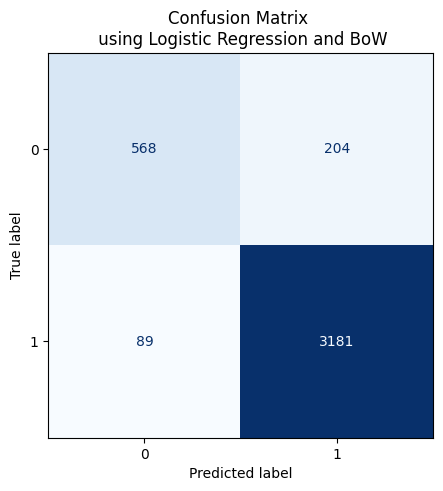

In [24]:
#YOUR CODE STARTS HERE#










# Accuracy first combination
accuracy_1 = metrics.accuracy_score(y_test, y_pred_1)
# Compute the confusion matrix
conf_1 = metrics.confusion_matrix(y_test, y_pred_1)
# Compute the specificity
specificity_1 = round(conf_1[0][0] / sum(conf_1[0]),2)
# COmput the recall
recall_1 = metrics.recall_score(y_test,y_pred_1)
# Print them all
print(f"Accuracy in the first model: \n {accuracy_1}\n")
print(f"Specificity in the first model: \n {specificity_1}\n")
print(f"Recall  in the first model: \n {recall_1}\n")



# Plot 
f, axes = plt.subplots(figsize=(20, 5), sharey='row') # Set the figure 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_1, display_labels = ["0", "1"]) # Compute the feature matrix
cm_display.plot(ax=axes, cmap = plt.cm.Blues);     
cm_display.ax_.set_title("Confusion Matrix \n using Logistic Regression and BoW");
cm_display.im_.colorbar.remove();






#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Accuracy in the second model: 
 0.9059871350816427

Specificity in the second model: 
 0.71

Recall in the second model: 
 0.9519877675840979



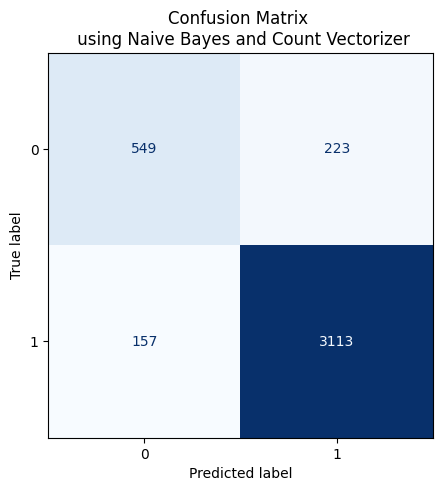

In [25]:
#YOUR CODE STARTS HERE#





# Compute the accuracy
accuracy_2 = metrics.accuracy_score(y_test, y_pred_2)
# Compute the confusion matrix
conf_2 = metrics.confusion_matrix(y_test, y_pred_2)
# Compute the specificity 
specificity_2 = round(conf_2[0][0] / sum(conf_2[0]),2)
# Compute the recall 
recall_2 = metrics.recall_score(y_test,y_pred_2)

# Print them all
print(f"Accuracy in the second model: \n {accuracy_2}\n")
print(f"Specificity in the second model: \n {specificity_2}\n")
print(f"Recall in the second model: \n {recall_2}\n")

# Plot
f, axes = plt.subplots(figsize=(20, 5), sharey='row') # Set the figure 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_2, display_labels = ["0", "1"]) # Compute the feature matrix
cm_display.plot(ax=axes, cmap = plt.cm.Blues);     
cm_display.ax_.set_title("Confusion Matrix \n using Naive Bayes and Count Vectorizer");
cm_display.im_.colorbar.remove();












#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Accuracy in the third model: 
 0.9230578921326076

Specificity in the third model: 
 0.71

Recall in the third model: 
 0.9807339449541285



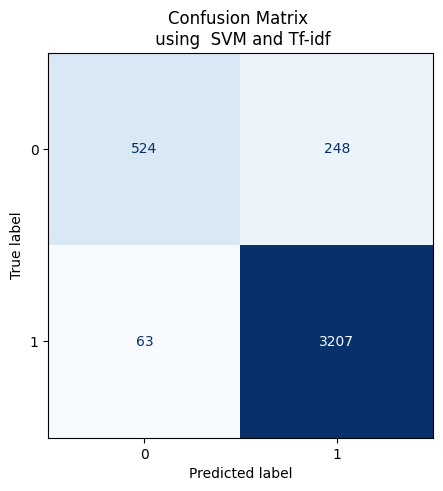

In [27]:
#YOUR CODE STARTS HERE#







# compute the  accuracy
accuracy_3 = metrics.accuracy_score(y_test, y_pred_3)
# compute the matrix
conf_3 = metrics.confusion_matrix(y_test, y_pred_3)
# compute the specificity
specificity_3 = round(conf_2[0][0] / sum(conf_3[0]),2)
# compute the Recall
recall_3 = metrics.recall_score(y_test,y_pred_3)

# Print them all
print(f"Accuracy in the third model: \n {accuracy_3}\n")
print(f"Specificity in the third model: \n {specificity_3}\n")
print(f"Recall in the third model: \n {recall_3}\n")

# PLOT
f, axes = plt.subplots(figsize=(20, 5), sharey='row') # Set the figure 
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_3, display_labels = ["0", "1"]) # Compute the feature matrix
cm_display.plot(ax=axes, cmap = plt.cm.Blues);     
cm_display.ax_.set_title("Confusion Matrix \n using  SVM and Tf-idf");
cm_display.im_.colorbar.remove();










#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Provide a rationale for the choice of metrics.

**Use at most 3 sentences.**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

We choose accuracy as our primary evaluation metric because it provides a straightforward measure of overall model performance that is easy to interpret, even for someone who are not experts in machine learning classification.
By specificity , we aim to highlight the issue in the classification of the negative label and in the other hand by showing the recall we highlight good performance to identify samples that belong to the positive class.



<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 1.1.6
Provide the company with all the information it needs to choose the pipeline it prefers.

In [28]:
#YOUR CODE STARTS HERE#







from tabulate import tabulate   # table visualization





table_data = [
    ["Endoding", "Model", "Accuracy", "Specificity", "Recall" , "Time"],
    ["BOW","Logistic Regression" ,accuracy_1, specificity_1, recall_1, round(end_time_1,2)],
    ["CountVectorizer", "Naive Bayes", accuracy_2,specificity_2, recall_2,round(end_time_2,2)],
    [ "Tfidf" ,"SVM" ,  accuracy_3, specificity_3 , recall_3, round(end_time_3,2) ]
]


# Printing the table
print(tabulate(table_data, headers="firstrow", tablefmt="fancy_grid"))














#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

╒═════════════════╤═════════════════════╤════════════╤═══════════════╤══════════╤════════╕
│ Endoding        │ Model               │   Accuracy │   Specificity │   Recall │   Time │
╞═════════════════╪═════════════════════╪════════════╪═══════════════╪══════════╪════════╡
│ BOW             │ Logistic Regression │   0.927511 │          0.74 │ 0.972783 │   4.37 │
├─────────────────┼─────────────────────┼────────────┼───────────────┼──────────┼────────┤
│ CountVectorizer │ Naive Bayes         │   0.905987 │          0.71 │ 0.951988 │   0.81 │
├─────────────────┼─────────────────────┼────────────┼───────────────┼──────────┼────────┤
│ Tfidf           │ SVM                 │   0.923058 │          0.71 │ 0.980734 │  55.36 │
╘═════════════════╧═════════════════════╧════════════╧═══════════════╧══════════╧════════╛


Describe what you have supplied and why.

**Use at most 3 sentences.**

We have supplied Accuracy, Specificity, Recall and time performance for each combination tried.
The reason why we supplied so is that we do not know a priori what the company preferes for the classifiication model.

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------


Also, explain how the company could decide between the classifiers you have produced.

**Use at most 3 sentences.**


If the company aims to work better on the negative aspect we advice the first combination, the one that provide a better specificity.
If the  company aims to do advertisement and so it cares just on the positive feedback, we advice the third combination since is the one that maximize the Recall metric. If the company would like to have a model that just train fastly, we advice the second model; nevertheless if the company want to maximaize the trade-off between time and good performance, we do advice the first or even the third one if the size is not too big. 

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------





<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

## Part 1.2

### 1.2.1
Consider a scenario in which you have a set of words.

These must be transformed into a representation suitable for Machine Learning.

However, each representation has a fixed limit $K$.

Comment on how 3 word representations would behave in this scenario.

**Use at most 3 sentences.**

----------YOUR TEXT STARTS HERE----------


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

# Part 2
In this part of the homework, you have to deal with Deep Learning.

Import here **ALL** the Python packages that you need for Part 2.

In [29]:
#REMOVE_OUTPUT#
#YOUR CODE STARTS HERE#
import torch
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
from torchtext.vocab import build_vocab_from_iterator
from torchtext.data.functional import to_map_style_dataset
from PIL import Image










#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

## Part 2.1
You have to use the same data as in Part 1, but you can use whatever adjustments you have made to it (only Part 1.1.2).

### 2.1.1
Prepare the data structures you will need.

In [30]:
#YOUR CODE STARTS HERE#


# adjust the observations, we want to have a list of words
data['review_text_adj'] = data['review_text'].apply(lambda x: eval(x))
X_train, X_test, y_train, y_test = train_test_split(data['review_text_adj'],
                                                    data['feedback'], test_size=0.2,
                                                     random_state=42)
# Function that returns the text from a tuple of label, text
def yield_tokens(data_iter):
    for _, text in data_iter:
        yield text



























#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [32]:
#YOUR CODE STARTS HERE#

















# Transform the train into a tuple of label and text
train= list(zip(y_train,X_train))
# Iter the observation of the train set
train_iter = iter(train)

# Build the vocabulary we will use
vocab = build_vocab_from_iterator(yield_tokens(train_iter), specials=["<unk>"])
vocab.set_default_index(vocab["<unk>"])












#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [33]:
#YOUR CODE STARTS HERE#
# Function that transform the word into
text_pipeline = lambda x: vocab(x)

# Perform on the GPU if possible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


def collate_batch(batch):
    label_list, text_list, offsets = [], [], [0]
    for (_label, _text) in batch:
         label_list.append(_label)
         processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
         text_list.append(processed_text)
         offsets.append(processed_text.size(0))
    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text_list = torch.cat(text_list)
    return label_list.to(device), text_list.to(device), offsets.to(device)



dataloader = DataLoader(train, batch_size=8, shuffle=True, collate_fn=collate_batch)















#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Briefly explain relevant parts of your code.

**Use at most 3 sentences.**


The code above creates a DataLoader taking $8$ batch of data. It provides the conversion based on the vocabulary we previously define and at the end of the dat convert it into a tensor, a suitable type for a pytorch neural network.

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 2.1.2
Define your model

In [50]:
#YOUR CODE STARTS HERE#

class TextClassificationModel(torch.nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = torch.nn.EmbeddingBag(vocab_size, embed_dim, sparse=False)
        self.relu = torch.nn.ReLU()
        self.fc = torch.nn.Linear(embed_dim, embed_dim//2)
        self.fc2 = torch.nn.Linear(embed_dim//2, embed_dim//4)
        self.fc3 = torch.nn.Linear(embed_dim//4, embed_dim//8)
        self.fc4 = torch.nn.Linear(embed_dim//8, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        first_linear = self.fc(embedded)
        relu = self.relu(first_linear)
        second_linear = self.fc2(relu)
        relu2 = self.relu(second_linear)
        third_linear = self.fc3(relu2)
        relu3 = self.relu(third_linear)
        return self.fc4(relu3)


vocab_size = len(vocab)
num_class = 2
emb_size = 64
model = TextClassificationModel(vocab_size, emb_size, num_class).to(device)




#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [74]:
#YOUR CODE STARTS HERE#

def train(dataloader):
    model.train()
    total_acc, total_count = 0, 0
    log_interval = 500
    start_time = time.time()

    for idx, (label, text, offsets) in enumerate(dataloader):
        optimizer.zero_grad()
        predicted_label = model(text, offsets)
        loss = criterion(predicted_label, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step()
        total_acc += (predicted_label.argmax(1) == label).sum().item()
        total_count += label.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches '
                  '| accuracy {:8.3f}'.format(epoch, idx, len(dataloader),
                                              total_acc/total_count))
            total_acc, total_count = 0, 0
            start_time = time.time()

def evaluate(dataloader):
    model.eval()
    total_acc, total_count = 0, 0
    with torch.no_grad():
        for idx, (label, text, offsets) in enumerate(dataloader):
            predicted_label = model(text, offsets)
            loss = criterion(predicted_label, label)
            total_acc += (predicted_label.argmax(1) == label).sum().item()
            total_count += label.size(0)

    return total_acc/total_count


#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Briefly explain relevant parts of your code.

**Use at most 3 sentences.**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

In the code above we provide a simple neural network, composed by $3$ hidden linear layers, $3$ ReLU as the activation functions. After definying the network we define the train and evaluation process that will be executed in different batchs and epochs. We also define the backpragation process that will update the weigths of the parameters.

<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 2.1.3
Train and optimize your model

In [67]:
#YOUR CODE STARTS HERE#
# Define the test and train dataset
test_data= list(zip(y_test,X_test))
train_data= list(zip(y_train,X_train))
# Hyperparameters
EPOCHS = 50 # epoch
LR = 5  # learning rate
BATCH_SIZE = 64 # batch size for training


































#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [68]:
#YOUR CODE STARTS HERE#












# Define the loss to minimize
criterion = torch.nn.CrossEntropyLoss()
# Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
# Preset the accuracy
total_accu = None
train_iter, test_iter = train_data, test_data
#Convert iterable-style dataset to map-style dataset
train_dataset = to_map_style_dataset(train_iter) 
#Convert iterable-style dataset to map-style dataset
test_dataset = to_map_style_dataset(test_iter) 
num_train = int(len(train_dataset) * 0.95)
split_train_, split_valid_ = \
    random_split(train_dataset, [num_train, len(train_dataset) - num_train])

train_dataloader = DataLoader(split_train_, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(split_valid_, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE,
                             shuffle=True, collate_fn=collate_batch)



#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [ ]:
#YOUR CODE STARTS HERE#










val_accuracy_1 = []
for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(train_dataloader)
    accu_val = evaluate(valid_dataloader)
    val_accuracy_1.append(accu_val)
    if total_accu is not None and total_accu > accu_val:
      scheduler.step()
    else:
       total_accu = accu_val
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} '.format(epoch,
                                           time.time() - epoch_start_time,
                                           accu_val))
    print('-' * 59)











#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Briefly explain relevant parts of your code.

**Use at most 3 sentences.**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

We train the neural network using $50$ epochs and a learning rate of $5$. 
We show at each epoch, the time required for the forward pass and the accuracy on the validation set.


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 2.1.4
Show the performance of your model

In [75]:
#YOUR CODE STARTS HERE#


print('Checking the results of test dataset.')
accu_test = evaluate(test_dataloader)
print('test accuracy {:8.3f}'.format(accu_test))




def predict(text, text_pipeline):
    with torch.no_grad():
        text = torch.tensor(text_pipeline(text))
        output = model(text, torch.tensor([0]))
        if output.argmax(1).item() == 1:
            return 'POSITIVE'
        else:
          return 'NEGATIVE'































#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Checking the results of test dataset.
test accuracy    0.914


This is review is:


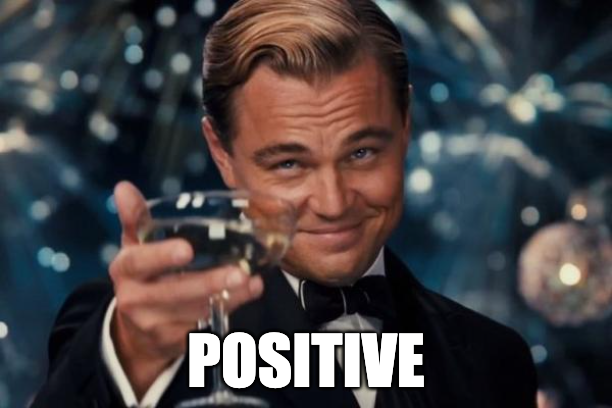

In [76]:
#YOUR CODE STARTS HERE#
def plot_imagine(prediction):
  if prediction == "POSITIVE":
    return positive_image
  else:
     return negative_image
  

positive_image = Image.open("/content/positive_meme.jpg" )
negative_image = Image.open("/content/negative.jpg" )



text_new = "The books are great, as expected - well worth the price. However, the box was cracked, I don't know if it was in transport or originally, one star less. I'll have to glue it back I guess."
text_new = translate_text(text_new)
text_new = preprocess_data(text_new)
model = model.to("cpu")


print("This is review is:")
plot_imagine(predict(text_new, text_pipeline))

#text_new = "I libri ovviamente sono opere meravigliose, ma è inaccettabile la condizione in cui sono arrivati. Il pacco è palesemente caduto dall’alto o è stato lanciato e il box dei libri è quindi arrivato rotto su un lato e ammaccato su un angolo. L’ammaccatura è così profonda da aver danneggiato anche un angolo di “il ritrono del re”. Tutto ciò è ancora più grave se si considera il prezzo molto alto del prodotto."
#text_new = translate_text(text_new)
#text_new = preprocess_data(text_new)
#model = model.to("cpu")


#print("This is review is:")
#print(plot_imagine(predict(text_new, text_pipeline)))

























#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

This is review is:


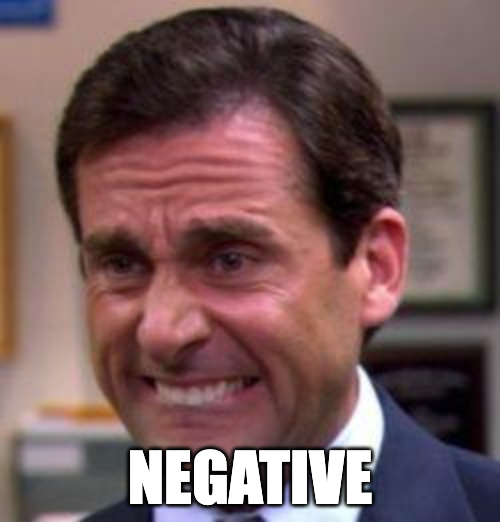

In [77]:
#YOUR CODE STARTS HERE#


text_new = "La serie è indiscutibilmente da 5 stelle, peccato che lo stesso non si possa dire per la condizione dei libri, che ahimè sono arrivati lievemente danneggiati."
text_new = translate_text(text_new)
text_new = preprocess_data(text_new)
model = model.to("cpu")


print("This is review is:")
plot_imagine(predict(text_new, text_pipeline))

































#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Briefly explain relevant parts of your code.

**Use at most 3 sentences.**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------

We have decided to show the same metrics we computed previously. [TODO] Commento sui risultati.
Additionaly we decide to test the model with a couple of reviews taken of the "The loard of the ring" book taken from Amazon.


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

### 2.1.5
Provide an ablation study on at least one and at most three parameters.

In [79]:
#YOUR CODE STARTS HERE#


class TextClassificationModel(torch.nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        #Computes sums or means of ‘bags’ of embeddings, without instantiating the intermediate embeddings.
        self.embedding = torch.nn.EmbeddingBag(vocab_size, embed_dim, sparse=False)
        
        self.fc = torch.nn.Linear(embed_dim, embed_dim//2)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(embed_dim//2, embed_dim//3)
        self.relu2 = torch.nn.ReLU()
        self.fc3 = torch.nn.Linear(embed_dim//3, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        first_linear = self.fc(embedded)
        relu = self.relu(first_linear)
        second_linear = self.fc2(relu)
        relu2 = self.relu2(second_linear)
        return self.fc3(relu2)


vocab_size = len(vocab)
num_class = 2
emb_size = 64
model = TextClassificationModel(vocab_size, emb_size, num_class).to(device)



#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [80]:
#YOUR CODE STARTS HERE#











criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
total_accu = None
train_iter, test_iter = train_data, test_data
train_dataset = to_map_style_dataset(train_iter) #Convert iterable-style dataset to map-style dataset.
test_dataset = to_map_style_dataset(test_iter) #Convert iterable-style dataset to map-style dataset.
num_train = int(len(train_dataset) * 0.95)
split_train_, split_valid_ = \
    random_split(train_dataset, [num_train, len(train_dataset) - num_train])

train_dataloader = DataLoader(split_train_, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(split_valid_, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE,
                             shuffle=True, collate_fn=collate_batch)









#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

In [ ]:
#YOUR CODE STARTS HERE#

val_accuracy_2 = []

for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(train_dataloader)
    accu_val = evaluate(valid_dataloader)
    val_accuracy_2.append(accu_val)
    if total_accu is not None and total_accu > accu_val:
      scheduler.step()
    else:
       total_accu = accu_val
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} '.format(epoch,
                                           time.time() - epoch_start_time,
                                           accu_val))
    print('-' * 59)


# TODO plot of the validation accuracy for both the two model. WHO LEARN FAST??
# TODO plot of the time















#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

Comment the ablation study.

**Use at most 3 sentences.**

[comment]: <> (#SHOW_CELL#)

----------YOUR TEXT STARTS HERE----------


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>

## Part 2.2

### 2.2.1
How would a Deep Learning model (of the kind we have seen) behave in the case where a word was never seen during training?
Answer on both practical and theoretical aspects.

**Use at most 3 sentences.**

----------YOUR TEXT STARTS HERE----------


<div style="page-break-after: always; visibility: hidden">
\pagebreak
</div>


# Submission instructions

Follow the instructions precisely
1. Run the whole notebook up to this point
  * Click on this text cell and go to Runtime > Run before
  * It is essential that the notebook can be run from start to finish without us having to change anything.
2. Download the current notebook
  * File -> Download -> Download .ipynb
3. Upload the downloaded notebook in the current runtime
  * In the left sidebar menu, open the last tab (Files)
  * Click on the first button under the File title (Page with arrow pointing up)
  * In the new window, upload the notebook just downloaded



4. To turn the notebook into a pdf you need to install a Tex extension: run the next cell of code:

In [ ]:
#REMOVE_CELL#
!apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

5. Now, run the next cell to set some cell tags in the notebook file.

In [ ]:
#REMOVE_CELL#
import nbformat as nbf
from glob import glob
notebooks = glob("/content/**/*.ipynb", recursive=True)

text_search_dict = ["YOUR TEXT STARTS HERE","#YOUR CODE STARTS HERE#"]

for ipath in notebooks:
    print(ipath)
    ntbk = nbf.read(ipath, nbf.NO_CONVERT)

    for cell in ntbk.cells:
        cell_type = cell['cell_type'] == "code"
      
        cell_tags = cell.get('metadata', {}).get('tags', [])
        cell_tags = set(cell_tags)

        if cell_type == 0: #markdown
          if (cell['source'][0]!="#" and text_search_dict[cell_type] not in cell['source'] and "pagebreak" not in cell['source']) or "#REMOVE_CELL#" in cell['source']:
            cell_tags.add("remove_cell")

        else: #code
          #if text_search_dict[cell_type] not in cell['source'] or "#REMOVE_CELL#" in cell['source']:
          if "#REMOVE_CELL#" in cell['source']:
            cell_tags.add("remove_cell")
          elif "#REMOVE_OUTPUT#" in cell['source']:
            cell_tags.add("remove_output")
        
        if len(cell_tags) > 0:
            cell['metadata']['tags'] = list(cell_tags)

    nbf.write(ntbk, ipath)

6. Now, run the next cell to transform the notebook to PDF without the code cells.
  * The file will appear in the menu on the left (refresh if needed). The file should be named `DMT2023_HW4.pdf`
  * Rename this file **Surname1_Surname2_DMT2023_HW4_report.pdf** (e.g. Becchetti_Siciliano_DMT2023_HW4_report.pdf). Sort the surnames alphabetically.
  * Click on it and using the right button or the three dots at its side, click on download to transfer it to your local PC
  

In [ ]:
#REMOVE_CELL#
!jupyter nbconvert /content/DMT2023_HW4.ipynb --to pdf --TagRemovePreprocessor.remove_cell_tags='{"remove_cell"}' -TagRemovePreprocessor.remove_all_outputs_tags='{"remove_output"}'

7. Now, rename the downloaded notebook **Surname1_Surname2_DMT2023_HW4_notebook.ipynb** (e.g. Becchetti_Siciliano_DMT2023_HW4_notebook.ipynb). Sort the surnames alphabetically.

8. Now that you have both files, you need to upload them to Classroom. Only the student with the surname that comes first in alphabetical order **must** upload the files. Only the files uploaded by this student will be graded.